# Part II - (Slide Presentation on FordGoBike )
## by Rasheedah Ogunpola


## Investigation Overview
> This presentation is to shows the relationship between user gender, age, trip duration and usertype



## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco, oakland and sanjose area. the data covers ride mainly in february 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata-clean.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

>  Relationship between Usertype, Age and Gender  

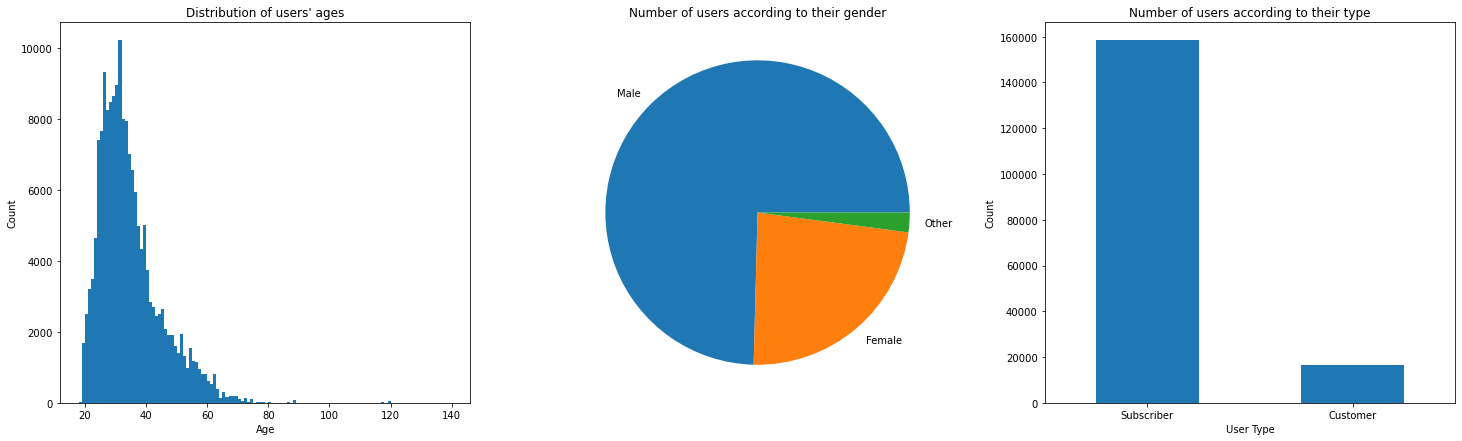

In [3]:
plt.figure(figsize=[25, 7])

plt.subplot(1, 3, 1)
bins = np.arange(df['age'].min(), df['age'].max())
plt.hist(df['age'], bins = bins);
plt.xlabel('Age');
plt.ylabel('Count');
plt.title("Distribution of users' ages");

plt.subplot(1, 3, 2)
genders = df['member_gender'].value_counts()
labels = ['Male', 'Female', 'Other']
plt.pie(genders, labels = labels);
plt.title("Number of users according to their gender");

plt.subplot(1, 3, 3)
user_type = df['user_type'].value_counts();
user_type.plot.bar(rot = 0);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title("Number of users according to their type");

## (Visualization 2)

>Relation between User Type, Trip Duration, and Users' Age

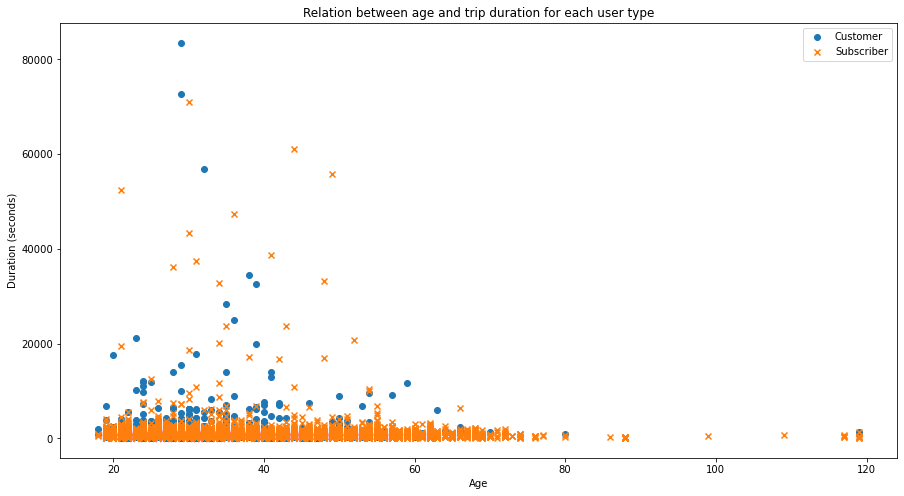

In [4]:
df_sample = df.sample(20000, random_state=1)
plt.figure(figsize = [15, 8]);
user_type_markers = [['Customer', 'o'], ['Subscriber', 'x']]
for cat, marker in user_type_markers:
    df_cat = df_sample[df_sample['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'duration_sec', marker = marker);   
plt.legend(['Customer','Subscriber']);
plt.xlabel('Age');
plt.ylabel('Duration (seconds)');
plt.title("Relation between age and trip duration for each user type");

## (Visualization 3)

> The hour of the day which people/riders takes bike most



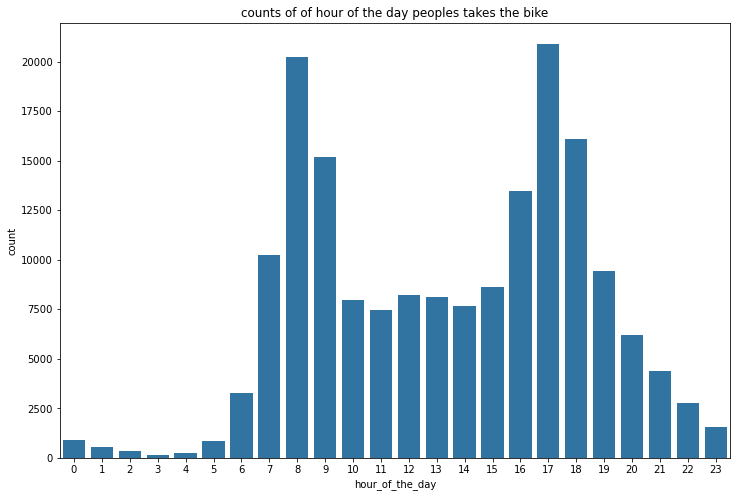

In [5]:

hour = df['start_time'].apply(lambda x: int(str(x)[:2]))
plt.figure(figsize=(12,8))
color = sb.color_palette()[0]
sb.countplot(hour, color = color)
plt.xlabel('hour_of_the_day')
plt.title('counts of of hour of the day peoples takes the bike');

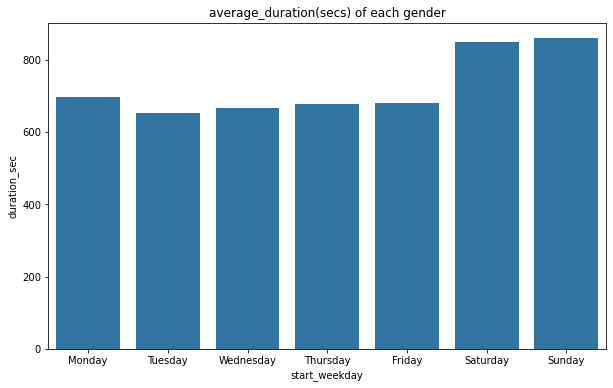

In [6]:
group = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=group)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df['start_weekday'] = df['start_weekday'].astype(vclasses);

plt.figure(figsize = (10,6))
average_time_day = df.groupby('start_weekday')['duration_sec'].mean().apply(lambda x: round(x,0))
color = sb.color_palette()[0]
sb.barplot(x = average_time_day.keys(), y = average_time_day, color = color)
plt.title('average_duration(secs) of each gender');

## Summary of Findings
> The dataset contains many males than females, and more subscribers than customers.<br>
> People who are between 20 and 40 years old tends to take more time in there trips.<br>
> Users tends to take bike trips more on Thursday, then Tuesday, then Wednesday. On the weekend the number of trips is roughly the same on Saturdays and Sundays. That is normal which may indicate that users take bikes for trips during working days.<br>
>Most trips takes place between 7 - 9 AM and at 4 - 6 PM. Obviously, There are not many trips from 12 AM to 5 AM.<br>
> In general, Customers spends more time in their bike trips more than subscribers.<br>
> The majority of older users are Subscribers and they spend little time in their bike trips.<br>
> Younger Customers trip duration is slightly more than younger subscribers

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [9]:
!jupyter nbconvert Slide_FordGoBike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Slide_FordGoBike.ipynb to slides
[NbConvertApp] Writing 698427 bytes to Slide_FordGoBike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\OGUNPOLA RASHEEDAH\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\OGUNPOLA RASHEEDAH\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\OGUNPOLA RASHEEDAH\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\OGUNPOLA RASHEEDAH\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\OGUNPOLA RASHEEDAH\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 